# MINI PROJECT - Loan Eligibility

I am going to perform an end-to-end analysis of the data set "Loan_Data" in order to creat a Logistic Regression Model that can help us predict the eligibility of a loan. 

The first step it to import the data and take a quick look into it in order to see and understand the columns and their values. 

In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import os

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [161]:
pd.options.display.max_columns = None

In [162]:
data = pd.read_csv('Loan_Data.csv')

In [163]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


 We can see that in our dataset we have 614 rows and 13 columns. 
 Let's see now what are the names of the columns:

In [164]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

We are also gonig to do a 'dtype' to see the types of each column. 

In [165]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [166]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


I want to see which ones of these columns are numerical and which ones are categorical 

In [167]:
data_numerical_columns= data.select_dtypes(include='number')

In [168]:
data_numerical_columns # Numerical columns

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0
...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0
610,4106,0.0,40.0,180.0,1.0
611,8072,240.0,253.0,360.0,1.0
612,7583,0.0,187.0,360.0,1.0


In [169]:
data_categorical_columns = data.select_dtypes(include='object')

In [170]:
data_categorical_columns #Categorical columns

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,Urban,Y


Now that I have had a first look into the data and it content I will start the data cleaning. 

### Data Cleaning

First I would like to standardize the header names of the columns.

In [171]:
data.columns = data.columns.str.lower()

In [172]:
data

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


Now it is time to check the NaN values

In [173]:
data.isna().sum() 

loan_id               0
gender               13
married               3
dependents           15
education             0
self_employed        32
applicantincome       0
coapplicantincome     0
loanamount           22
loan_amount_term     14
credit_history       50
property_area         0
loan_status           0
dtype: int64

In [174]:
data.credit_history.value_counts()

1.0    475
0.0     89
Name: credit_history, dtype: int64

In [175]:
data.self_employed.value_counts()

No     500
Yes     82
Name: self_employed, dtype: int64

I see the number of Nans are not that much of a significant importance, so am going to drop them.

In [176]:
data = data.dropna()

In [177]:
data.isna().sum() 

loan_id              0
gender               0
married              0
dependents           0
education            0
self_employed        0
applicantincome      0
coapplicantincome    0
loanamount           0
loan_amount_term     0
credit_history       0
property_area        0
loan_status          0
dtype: int64

### EDA

I am going to start the Exploratory Data Analysis (EDA), this will help us understand the statistical aspects of the data and see it's insights. 

In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [179]:
data.describe().apply(lambda x: round(x,2)) # More information about the numerical variables. 

,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history
count,480.00,480.00,480.00,480.00,480.00
mean,5364.23,1581.09,144.74,342.05,0.85
std,5668.25,2617.69,80.51,65.21,0.35
min,150.00,0.00,9.00,36.00,0.00
25%,2898.75,0.00,100.00,360.00,1.00
50%,3859.00,1084.50,128.00,360.00,1.00
75%,5852.50,2253.25,170.00,360.00,1.00
max,81000.00,33837.00,600.00,480.00,1.00


#### GOAL

Our goal is to predict weather a loan would be approved or Not. This means our target variable will be loan_status.

Is a good idea to plot some graph to understand more the data and to see if there are any relationship between variables

In [180]:
data.loan_status.value_counts()

Y    332
N    148
Name: loan_status, dtype: int64

In [181]:
# I normalize to print the proportion of number 
data['loan_status'].value_counts(normalize=True)

Y    0.691667
N    0.308333
Name: loan_status, dtype: float64

From our data almost 70% of the loans were approved, whereas 30% were not. 

<AxesSubplot:xlabel='loan_status', ylabel='count'>

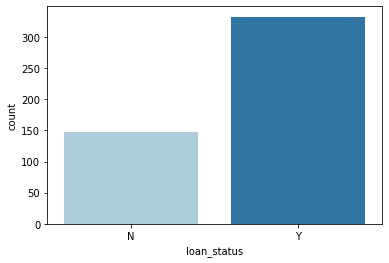

In [182]:
sns.countplot('loan_status', data=data, palette = "Paired")

Basically our target variable (loan_status) tells us if a loan is approved or not (Y/N). We can see that from our data 332 loans have been approved, whereas 148 haven't. 

### CATAGORICAL VARIABLES

We are going to start exploring the categorical variables 

 I want to see if there is a relation between gender, education, self employed and married with the fact that the loan is approved or not. 

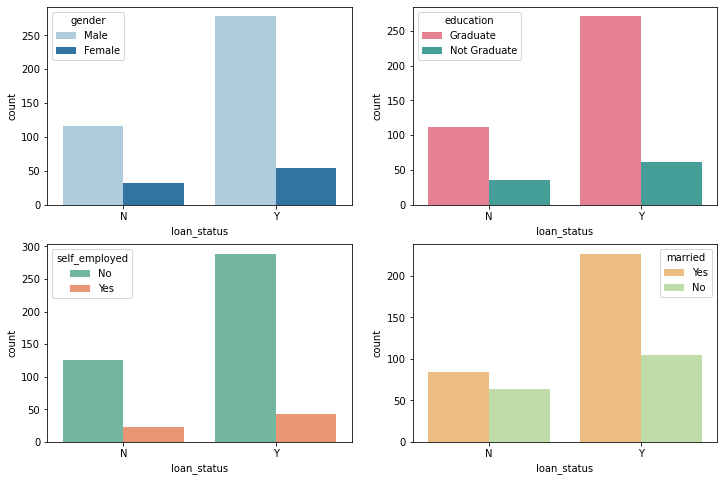

In [183]:
plt.figure(figsize=(12,8))
plt.subplot(221)
sns.countplot('loan_status', hue='gender', data=data, palette = "Paired")
plt.subplot(222)
sns.countplot('loan_status', hue='education', data=data, palette = "husl")
plt.subplot(223)
sns.countplot('loan_status', hue='self_employed', data=data, palette = "Set2")
plt.subplot(224)
sns.countplot('loan_status', hue='married', data=data, palette="Spectral")
plt.show()

In [184]:
data.gender.value_counts()

Male      394
Female     86
Name: gender, dtype: int64

We have much more values of male than female, which could explain such difference we see in the graph above between females and males, however, it seems it could be a relationship; It is more likely that if you are a men you will get an approval than if your are a women. However we can't be sure because the proportion of male and female data is not balanced. 

In [185]:
data.education.value_counts()

Graduate        383
Not Graduate     97
Name: education, dtype: int64

The same happens with the level of education. It can also be a relation between Graduated and Not Graduated, as we see, the graduates have more loans approved then the no graduations.

Also it look like the self_employed persons tend to have less loans approved, and the people that are married have more loans approved that the ones that aren't. 

<AxesSubplot:xlabel='loan_status', ylabel='Count'>

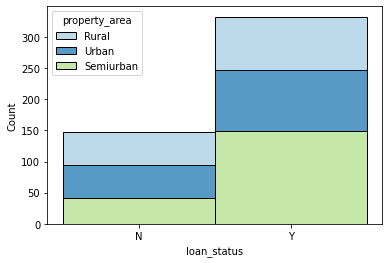

In [186]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.histplot(binwidth=0.5, x="loan_status", hue="property_area", data=data, stat="count", palette = "Paired", multiple="stack")

With this graph we can't se a clear relation between the propery area and the approvment of loans. 

<AxesSubplot:xlabel='loan_status', ylabel='Count'>

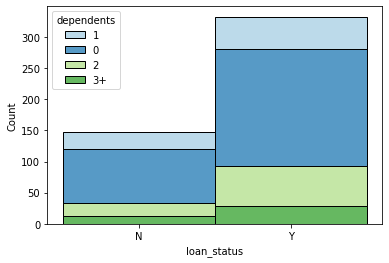

In [187]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.histplot(binwidth=0.5, x="loan_status", hue="dependents", data=data, stat="count", palette = "Paired", multiple="stack")

The department that gets more loans approved is 0

#### Contingency Table

In [188]:
data_crosstab = pd.crosstab(data['gender'],
                            data['loan_status'], 
                               margins = False)
print(data_crosstab)

loan_status    N    Y
gender               
Female        32   54
Male         116  278


More loans were approved to males.

In [189]:
data_crosstab = pd.crosstab(data['education'],
                            data['loan_status'], 
                               margins = False)
print(data_crosstab)

loan_status     N    Y
education             
Graduate      112  271
Not Graduate   36   61


It seems there could be a relationship between beeing graduated and loan approved, as more graduated people have an approvment. 

In [190]:
data_crosstab = pd.crosstab(data['self_employed'],
                            data['loan_status'], 
                               margins = False)
print(data_crosstab)

loan_status      N    Y
self_employed          
No             125  289
Yes             23   43


It seems that being not self employed is easier to get a yes for a loan approvement. 

In [191]:
data_crosstab = pd.crosstab(data['married'],
                            data['loan_status'], 
                               margins = False)
print(data_crosstab)

loan_status   N    Y
married             
No           64  105
Yes          84  227


Also being married could have a positive relationship with loan status.

In [192]:
data_crosstab = pd.crosstab(data['property_area'],
                            data['loan_status'], 
                               margins = False)
print(data_crosstab)

loan_status     N    Y
property_area         
Rural          54   85
Semiurban      42  149
Urban          52   98


We can see that the area that gets more loan approvments is the Semiurban. 

In [193]:
data_crosstab = pd.crosstab(data['dependents'],
                            data['loan_status'], 
                               margins = False)
print(data_crosstab)

loan_status   N    Y
dependents          
0            87  187
1            28   52
2            20   65
3+           13   28


As we have seen in the graph above the department that gets more loans approved is 0

### NUMERICAL VARIABLES

Now we are going to take a look into the numerical varialbes of our data

Let's see the distribution of each variable

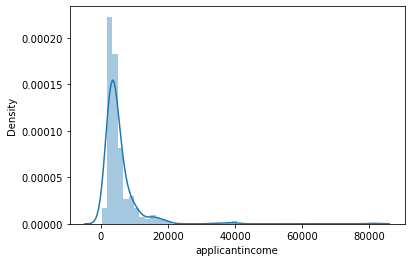

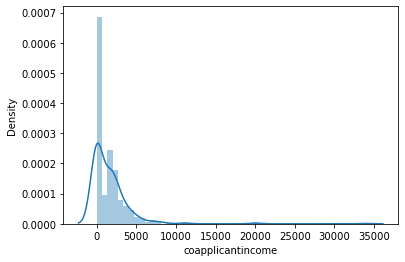

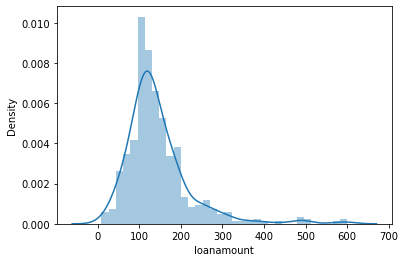

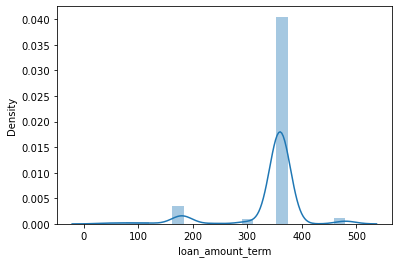

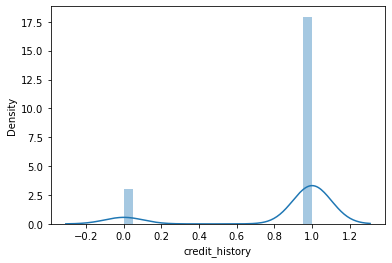

In [194]:
for column in data.select_dtypes(np.number).columns: 
    sns.distplot(data[column])
    plt.show()

It looks like ApplicantIncome, CoapplicantIncome and LoanAmount have quite of a normal distribution, however Loan_Amount_Term and Credit_History doesn't at all. 

With the grapth I can see that credit_history only takes values 0.0 and 1.0, so  I will treat it like a binary variable

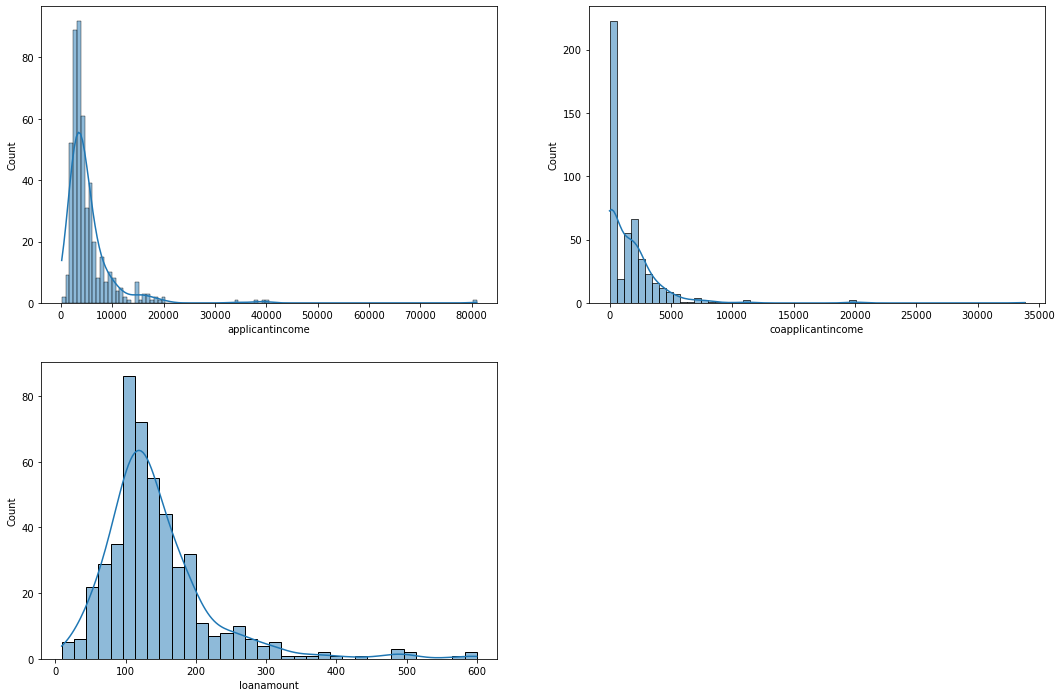

In [195]:
plt.figure(figsize=(18,12))

plt.subplot(221)
sns.histplot(data=data, x="applicantincome", kde=True)

plt.subplot(222)
sns.histplot(data=data, x="coapplicantincome", kde=True)

plt.subplot(223)
sns.histplot(data=data, x="loanamount", kde=True)

plt.show()


In [196]:
data.groupby('loan_status', as_index=False)['applicantincome'].mean()

,loan_status,applicantincome
0,N,5730.189189
1,Y,5201.093373


Text(0, 0.5, 'Average Applicant Income')

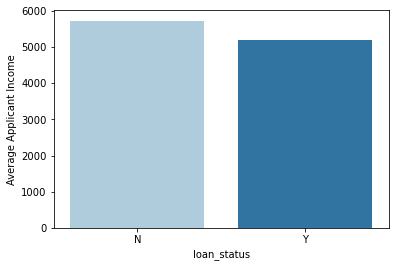

In [197]:
sns.barplot(x='loan_status', y='applicantincome', data=data,palette = "Paired", ci=False)


plt.ylabel('Average Applicant Income')

We can see there isn't much difference between that the average application income for the loans approved and the not approved. So I don't think there is a significant relationship between the income of the applicant and the loan status. 

In [198]:
data.groupby('loan_status', as_index=False)['coapplicantincome'].mean()

,loan_status,coapplicantincome
0,N,1773.081081
1,Y,1495.508795


Text(0, 0.5, 'Average Co Applicant Income')

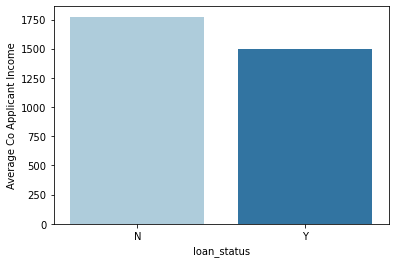

In [199]:
sns.barplot(x='loan_status', y='coapplicantincome', data=data,palette = "Paired", ci=False)


plt.ylabel('Average Co Applicant Income')

In [200]:
data.groupby('loan_status', as_index=False)['loanamount'].mean()

,loan_status,loanamount
0,N,153.378378
1,Y,140.882530


Text(0, 0.5, 'Average Loan Amount')

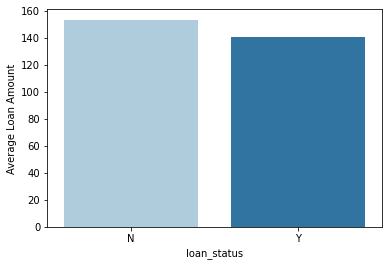

In [201]:
sns.barplot(x='loan_status', y='loanamount', data=data,palette = "Paired", ci=False)


plt.ylabel('Average Loan Amount')

These results might not be as expected, since in the 3 cases we would expect YES to be higher within income and amount. This could be because we have less data with NO, so an outlier can have a big influence in to the average.

Now that we have explored a little bit the numerical variables, let's see if there are correlation between them to see if we could have a problem of multicollinearity 

In [202]:
data.corr()

,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history
applicantincome,1.000000,-0.112588,0.495310,-0.010838,-0.056152
coapplicantincome,-0.112588,1.000000,0.190740,-0.005775,-0.008692
loanamount,0.495310,0.190740,1.000000,0.050867,-0.040773
loan_amount_term,-0.010838,-0.005775,0.050867,1.000000,0.032937
credit_history,-0.056152,-0.008692,-0.040773,0.032937,1.000000


<AxesSubplot:>

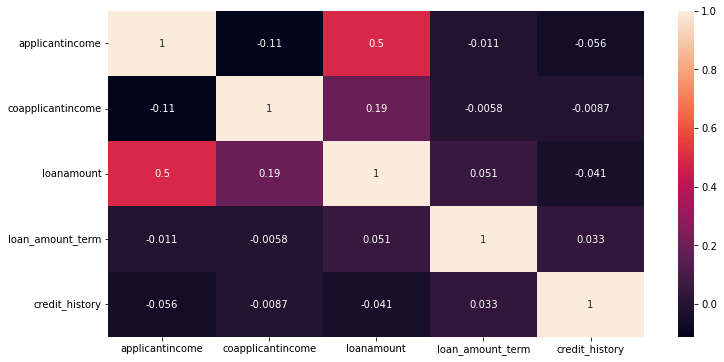

In [203]:
 plt.figure(figsize=(12,6))
sns.heatmap(data.corr(), annot=True)

We don't have any correlation too high so I am not droping any variable. 

### CORRELATION ANALYSIS

Now I am going to do the same but taking into account also the categorical variables.

First I have to encode categorical features. I have choose Label Encoding because I think in this case it works better. This approach involves converting each value in a column to a number. 

In [204]:
data_categorical_columns

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,Urban,Y


In [205]:
from tqdm.auto import tqdm

In [206]:
from sklearn.preprocessing import LabelEncoder

In [207]:
categorical_columns = data.select_dtypes(include='object').columns
print(categorical_columns)

label_encoder = LabelEncoder()

for column in tqdm(categorical_columns):
    data[column] = label_encoder.fit_transform(data[column])

Index(['loan_id', 'gender', 'married', 'dependents', 'education',
       'self_employed', 'property_area', 'loan_status'],
      dtype='object')


  0%|          | 0/8 [00:00<?, ?it/s]

<AxesSubplot:>

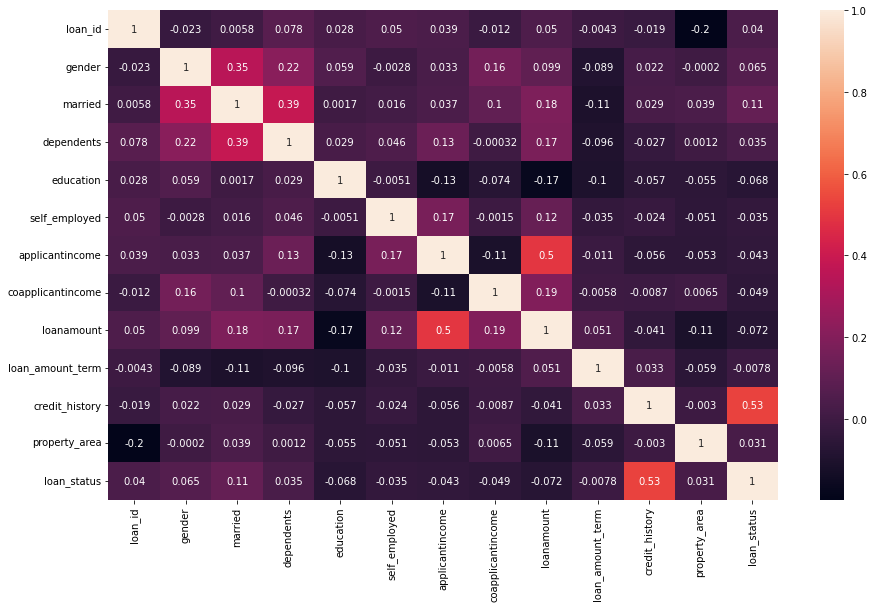

In [208]:
plt.figure(figsize=(15,9))
sns.heatmap(data.corr(), annot=True)

We can see that the variables most correlated with our target variable (loan_status) is credit_history. 

### LOGISTIC REGRESSION 

Let's stard build our classification model

In [209]:
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

##### Data Split

In [210]:
y = data['loan_status']
X = data.drop('loan_status', axis=1)

In [211]:
X

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area
1,0,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2
3,2,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2
4,3,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2
5,4,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
609,475,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0
610,476,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0
611,477,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2
612,478,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2


In [212]:
y

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: loan_status, Length: 480, dtype: int64

In [213]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [214]:
classification = LogisticRegression(random_state=42) 

classification.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [215]:
classification.score(X_test, y_test)

0.8020833333333334

The accuracy of our model is 80%, which means how many correct values the model got it right.

In [216]:
# to get predictions
predictions = classification.predict(X_test)
predictions

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1])

###### Keep in mind: 0=NO approved, 1= YES approved

In [217]:
pd.Series(predictions).value_counts()

1    85
0    11
dtype: int64

In [218]:
# to get the probability of getting a NO (0) vs getting a YES (1)
predictions_ = classification.predict_proba(X_test)
predictions_ 

array([[0.14085812, 0.85914188],
       [0.35497185, 0.64502815],
       [0.35356577, 0.64643423],
       [0.6987878 , 0.3012122 ],
       [0.2165555 , 0.7834445 ],
       [0.48178866, 0.51821134],
       [0.20565335, 0.79434665],
       [0.22603597, 0.77396403],
       [0.10826318, 0.89173682],
       [0.25767368, 0.74232632],
       [0.09377752, 0.90622248],
       [0.16285499, 0.83714501],
       [0.22689732, 0.77310268],
       [0.15476072, 0.84523928],
       [0.13126333, 0.86873667],
       [0.12216617, 0.87783383],
       [0.69424084, 0.30575916],
       [0.81774219, 0.18225781],
       [0.0886722 , 0.9113278 ],
       [0.25067422, 0.74932578],
       [0.2953197 , 0.7046803 ],
       [0.40627957, 0.59372043],
       [0.1625383 , 0.8374617 ],
       [0.30294151, 0.69705849],
       [0.20669524, 0.79330476],
       [0.28086703, 0.71913297],
       [0.35111087, 0.64888913],
       [0.73358739, 0.26641261],
       [0.19314695, 0.80685305],
       [0.13817417, 0.86182583],
       [0.

For example, in the first case this is telling us we have a probability of 14% of getting a NO and a probability of 86% of getting a YES.

In [219]:
cf_matrix=confusion_matrix(y_test, predictions)

<AxesSubplot:>

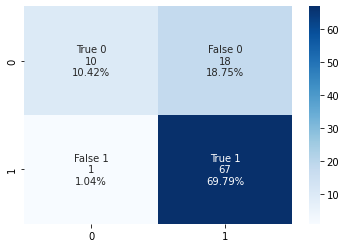

In [220]:
group_names = ['True 0', 'False 0', 'False 1', 'True 1']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In the first square we have those real values that were 0 (no) and the predictic value was also 0 (no), theses corresponds a 10,42%. In the second square the real value = 0 however the predicted value = 1, these are 18,75%.  In the white square, real value=0 and the predicted value = 1, they are a 1,04% and finally  in the last square the real value =1 and the predicted value = 1. 

In [221]:
import math

results = pd.DataFrame()
results['true'] = y_test
results['pred'] = predictions

<AxesSubplot:ylabel='loan_status'>

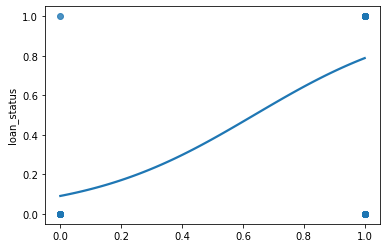

In [222]:
sns.regplot(x=predictions, y=y_test, data=data, logistic=True, ci=None)

<AxesSubplot:xlabel='true', ylabel='pred'>

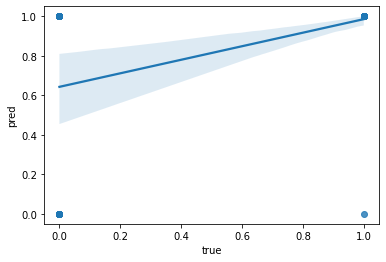

In [223]:
sns.regplot(results['true'], results['pred'])

### IMPROVING THE MODEL 

I am going to try to improve our model by balancing the dataset

In [224]:
from imblearn.under_sampling import RandomUnderSampler

In [225]:
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X, y)

In [226]:
X_resampled_train, X_resampled_test, y_resampled_train, y_resampled_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [227]:
classification = LogisticRegression(random_state=42) 

classification.fit(X_resampled_train, y_resampled_train)

LogisticRegression(random_state=42)

In [228]:
classification.score(X_resampled_test, y_resampled_test)

0.6833333333333333

Now we have a lower accuracy, however this doesn't necessarily mean that the quality of our model has fallen, the drop in accuracy is due to the data balance.

In [229]:
predictions = classification.predict(X_resampled_test)
predictions

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1])

In [230]:
pd.Series(predictions).value_counts()

1    42
0    18
dtype: int64

In [231]:
cf_matrix=confusion_matrix(y_resampled_test, predictions)

<AxesSubplot:>

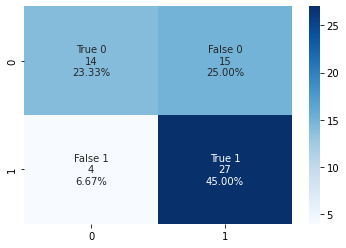

In [232]:
group_names = ['True 0', 'False 0', 'False 1', 'True 1']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

We see that now we have less True 1, which are the ones where real value=1 and predictic value=1, however we have a much higher percentage of True 0, which are the ones where the real value=0 and the predicted valu=1. 

This means that by balancing our data we have improve the model, at list when talking about predicting the NO approvment (0). 

The first model was better in predicting true 1, and the second model is better in predicting true 0.

<AxesSubplot:ylabel='loan_status'>

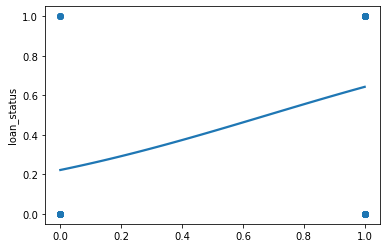

In [233]:
sns.regplot(x=predictions, y=y_resampled_test, data=data, logistic=True, ci=None)

In [234]:
# saving the dataframe
data.to_csv('finalfile.csv', index=False)